<a href="https://colab.research.google.com/github/RicAntonio/Hourly-Energy-Consumption/blob/main/Carga_y_analisis_de_Datos_Hourly_Energy_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cargamos nuestra data con kaggle.json cuando no tengamos a la mano el csv o no tiene csv pero si la data

In [1]:
!pip install kaggle

# Crea el directorio de Kaggle y mueve el archivo
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Descarga el dataset
!kaggle datasets download -d robikscube/hourly-energy-consumption

# Descomprime el dataset
!unzip hourly-energy-consumption.zip


Dataset URL: https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption
License(s): CC0-1.0
 44% 5.00M/11.4M [00:00<00:00, 41.6MB/s]
100% 11.4M/11.4M [00:00<00:00, 80.0MB/s]
Archive:  hourly-energy-consumption.zip
  inflating: AEP_hourly.csv          
  inflating: COMED_hourly.csv        
  inflating: DAYTON_hourly.csv       
  inflating: DEOK_hourly.csv         
  inflating: DOM_hourly.csv          
  inflating: DUQ_hourly.csv          
  inflating: EKPC_hourly.csv         
  inflating: FE_hourly.csv           
  inflating: NI_hourly.csv           
  inflating: PJME_hourly.csv         
  inflating: PJMW_hourly.csv         
  inflating: PJM_Load_hourly.csv     
  inflating: est_hourly.paruqet      
  inflating: pjm_hourly_est.csv      


## Sacar lista de los csv para saber que usaremos como principal por zona horaria  

In [4]:
import os

# Lista los archivos en el directorio actual
print(os.listdir())


['.config', 'DUQ_hourly.csv', 'NI_hourly.csv', 'pjm_hourly_est.csv', 'est_hourly.paruqet', 'COMED_hourly.csv', 'DOM_hourly.csv', 'PJMW_hourly.csv', 'DAYTON_hourly.csv', 'DEOK_hourly.csv', 'hourly-energy-consumption.zip', 'AEP_hourly.csv', 'FE_hourly.csv', 'EKPC_hourly.csv', 'PJM_Load_hourly.csv', 'PJME_hourly.csv', 'kaggle.json', 'sample_data']


In [5]:
#Al saber que csv usaremos sacaremos las filas de los datos que tiene nuestro csv
import pandas as pd

# Carga el archivo específico
data = pd.read_csv('pjm_hourly_est.csv')

# Muestra las primeras filas
print(data.head())


              Datetime  AEP  COMED  DAYTON  DEOK  DOM  DUQ  EKPC  FE  NI  \
0  1998-12-31 01:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   
1  1998-12-31 02:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   
2  1998-12-31 03:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   
3  1998-12-31 04:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   
4  1998-12-31 05:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   

   PJME  PJMW  PJM_Load  
0   NaN   NaN   29309.0  
1   NaN   NaN   28236.0  
2   NaN   NaN   27692.0  
3   NaN   NaN   27596.0  
4   NaN   NaN   27888.0  


In [6]:
#Sacamos las columnas para identificar las zonas horarias que tiene nuestro csv y elegir la que usaremos
print(data.columns)


Index(['Datetime', 'AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'EKPC',
       'FE', 'NI', 'PJME', 'PJMW', 'PJM_Load'],
      dtype='object')


In [7]:
#Verificamos de nuevo si las filas estan correctas
import pandas as pd

# Carga el archivo CSV
data = pd.read_csv('pjm_hourly_est.csv')

# Muestra las primeras filas para asegurarte de que se cargó correctamente
print(data.head())


              Datetime  AEP  COMED  DAYTON  DEOK  DOM  DUQ  EKPC  FE  NI  \
0  1998-12-31 01:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   
1  1998-12-31 02:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   
2  1998-12-31 03:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   
3  1998-12-31 04:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   
4  1998-12-31 05:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   

   PJME  PJMW  PJM_Load  
0   NaN   NaN   29309.0  
1   NaN   NaN   28236.0  
2   NaN   NaN   27692.0  
3   NaN   NaN   27596.0  
4   NaN   NaN   27888.0  


## Revisamos si hay valores nulos

In [8]:
# Información general del DataFrame
print(data.info())

# Muestra las primeras filas
print(data.head())

# Revisa si hay valores nulos
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178262 entries, 0 to 178261
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  178262 non-null  object 
 1   AEP       121273 non-null  float64
 2   COMED     66497 non-null   float64
 3   DAYTON    121275 non-null  float64
 4   DEOK      57739 non-null   float64
 5   DOM       116189 non-null  float64
 6   DUQ       119068 non-null  float64
 7   EKPC      45334 non-null   float64
 8   FE        62874 non-null   float64
 9   NI        58450 non-null   float64
 10  PJME      145366 non-null  float64
 11  PJMW      143206 non-null  float64
 12  PJM_Load  32896 non-null   float64
dtypes: float64(12), object(1)
memory usage: 17.7+ MB
None
              Datetime  AEP  COMED  DAYTON  DEOK  DOM  DUQ  EKPC  FE  NI  \
0  1998-12-31 01:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   
1  1998-12-31 02:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   
2 

Verificamos el cambio

In [9]:
# Convierte la columna de fecha a formato datetime (ajusta el nombre de la columna si es diferente)
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Configura la columna de fecha como índice (opcional)
data.set_index('Datetime', inplace=True)

# Verifica el cambio
print(data.head())


                     AEP  COMED  DAYTON  DEOK  DOM  DUQ  EKPC  FE  NI  PJME  \
Datetime                                                                      
1998-12-31 01:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   
1998-12-31 02:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   
1998-12-31 03:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   
1998-12-31 04:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   
1998-12-31 05:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   

                     PJMW  PJM_Load  
Datetime                             
1998-12-31 01:00:00   NaN   29309.0  
1998-12-31 02:00:00   NaN   28236.0  
1998-12-31 03:00:00   NaN   27692.0  
1998-12-31 04:00:00   NaN   27596.0  
1998-12-31 05:00:00   NaN   27888.0  


Sacamos las columnas y elegir con cual hacer los analisis y

In [11]:
print(data.columns)


Index(['AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'EKPC', 'FE', 'NI',
       'PJME', 'PJMW', 'PJM_Load'],
      dtype='object')


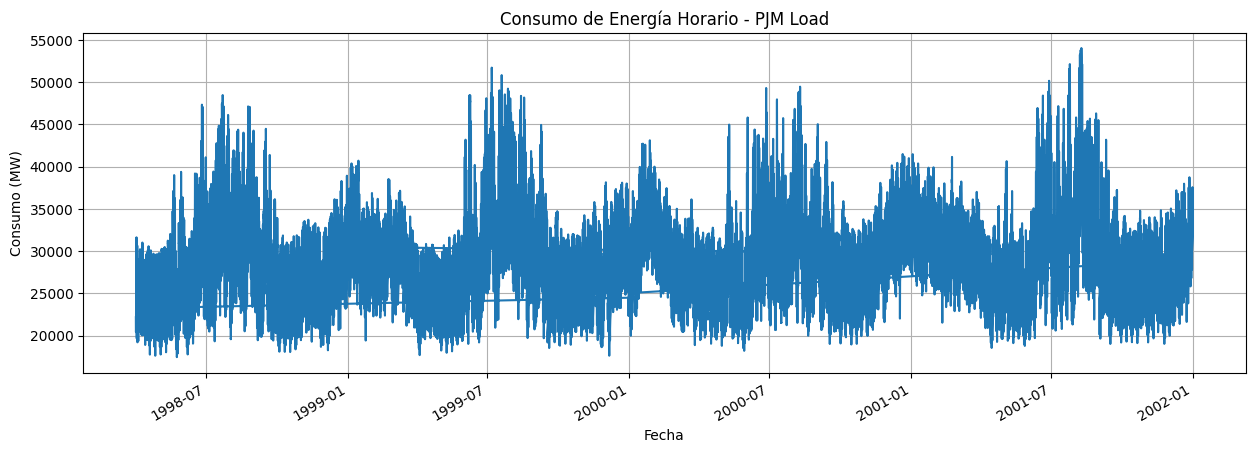

In [12]:
# Graficar el consumo de energía para la columna 'PJM_Load'
data['PJM_Load'].plot(figsize=(15, 5))
plt.title("Consumo de Energía Horario - PJM Load")
plt.xlabel("Fecha")
plt.ylabel("Consumo (MW)")  # Ajusta la unidad si es diferente
plt.grid()
plt.show()


In [13]:
# Verifica si hay una columna de tiempo
print(data.head())


                     AEP  COMED  DAYTON  DEOK  DOM  DUQ  EKPC  FE  NI  PJME  \
Datetime                                                                      
1998-12-31 01:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   
1998-12-31 02:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   
1998-12-31 03:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   
1998-12-31 04:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   
1998-12-31 05:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   

                     PJMW  PJM_Load  
Datetime                             
1998-12-31 01:00:00   NaN   29309.0  
1998-12-31 02:00:00   NaN   28236.0  
1998-12-31 03:00:00   NaN   27692.0  
1998-12-31 04:00:00   NaN   27596.0  
1998-12-31 05:00:00   NaN   27888.0  


In [14]:
# Verificar valores faltantes
print(data.isnull().sum())

# Porcentaje de valores faltantes
missing_percentage = data.isnull().mean() * 100
print(missing_percentage)


AEP          56989
COMED       111765
DAYTON       56987
DEOK        120523
DOM          62073
DUQ          59194
EKPC        132928
FE          115388
NI          119812
PJME         32896
PJMW         35056
PJM_Load    145366
dtype: int64
AEP         31.969236
COMED       62.697041
DAYTON      31.968114
DEOK        67.610035
DOM         34.821218
DUQ         33.206180
EKPC        74.568893
FE          64.729443
NI          67.211184
PJME        18.453737
PJMW        19.665436
PJM_Load    81.546263
dtype: float64


In [15]:
# Eliminar filas con valores NaN
clean_data = data.dropna(subset=['PJM_Load', 'AEP', 'COMED'])


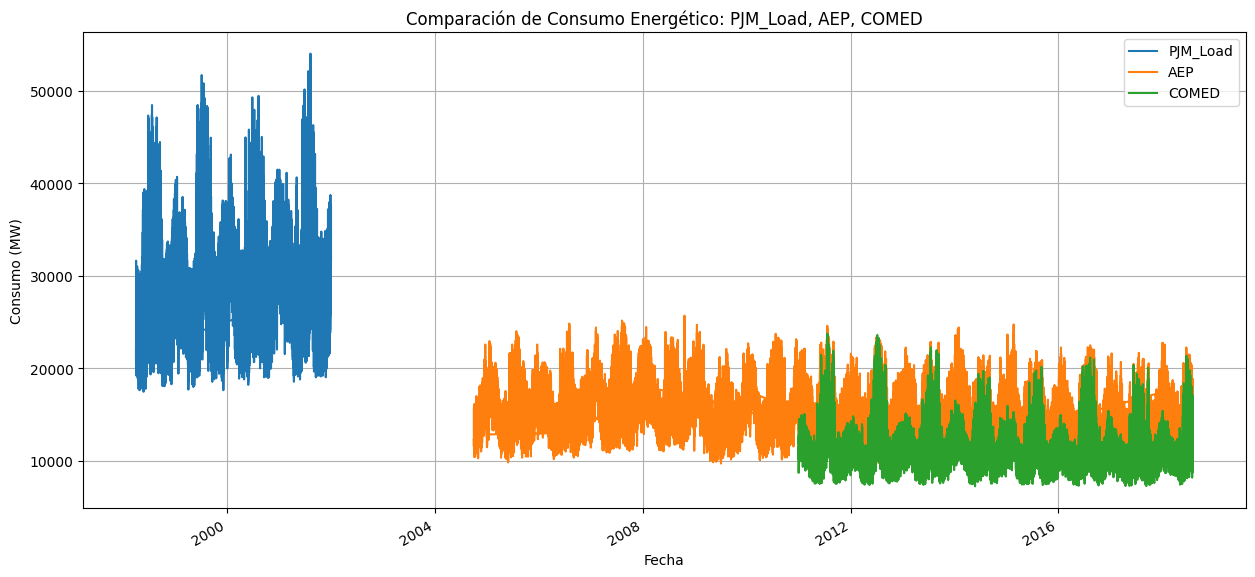

In [16]:
data[['PJM_Load', 'AEP', 'COMED']].plot(figsize=(15, 7))
plt.title("Comparación de Consumo Energético: PJM_Load, AEP, COMED")
plt.xlabel("Fecha")
plt.ylabel("Consumo (MW)")
plt.legend()
plt.grid()
plt.show()


          PJM_Load       AEP     COMED
PJM_Load       1.0       NaN       NaN
AEP            NaN  1.000000  0.820753
COMED          NaN  0.820753  1.000000


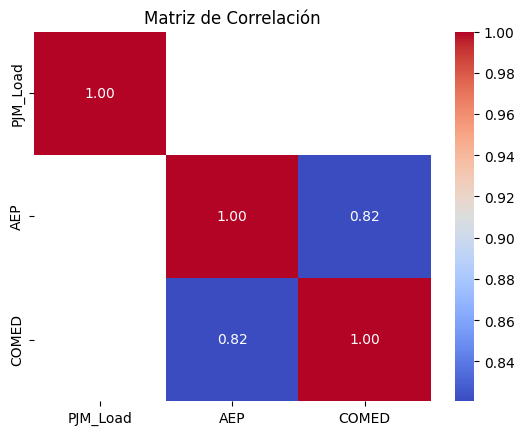